In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Classification

Membaca dataset **"Titanic"** dari database *Seaborn*


In [0]:
titanic = sns.load_dataset("titanic")

## Evaluasi Data 

Melihat data titanic

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Melihat bentuk dataframe

In [4]:
titanic.shape

(891, 15)

Pada data terlihat banyak sekali data yang memiliki ***NaN*** yang merupakan data kososng

butuh diingat data ***NaN*** berbeda dengan data dengan nilai **nol (0)** yang memiliki suatu nilai, sedangkan ***NaN*** menunjukan tidak adanya data

---

Maka dari itu, ditinjau berapa data yang memiliki nilai ***NaN*** dengan `cell` berikut 


In [5]:
 titanic.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Terlihat bahwa data **deck** memiliki 688 data `NaN` dari 891 total data. Maka data column deck lebih baik dihapuskan. Sedangkan data lain seperti `age`, `embark_town` dan lain-lain lebih baik disimpan saja, namun data dengan nilai `NaN` dihapuskan saja. Maka dilakukanlah **data cleaning**.

---

dibuat copy dari tabel untuk menyimpan dataset utama, hal ini dilakukan untuk menjaga bila terjadi kehilangan data karena kesalahan pengolahan data.



In [0]:
new_df = titanic.copy()

## Data Cleaning

Menghapus kolom deck

In [0]:
new_df = new_df.drop(columns = 'deck')


dikarenakan colomn `pclass` dan `class` merupakan data sama dalama format berbeda, maka data `pclass` didrop untuk mengurangi data tidak penting. begitu pula dengan data `survive` dan `alive`, data `adult_male` juga sama dapat diambil dari data `age` dan `sex`. `embark_town` dan `embark` juga memiliki data yang sama

In [0]:
new_df = new_df.drop(columns = 'pclass')
new_df = new_df.drop(columns = 'adult_male')
new_df = new_df.drop(columns = 'alive')
new_df = new_df.drop(columns = 'embark_town')

In [9]:
 new_df.isnull().sum(axis = 0)

survived      0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
dtype: int64

Drop data dengan nilai `NaN`

In [0]:
new_df = new_df.dropna()

Mengecek bentuk data setelah data cleaning

In [11]:
new_df.shape

(712, 10)

## Data Wrangling

Dilihat dari dataset diatas banyak data yang memiliki bentuk `string` dan juga data `pclass` memiliki bentuk angka namun merupakan data yang menunjukan kelas yang ada pada kapal. Maka untuk menghindari itu dapat digunakan metode **one hot encoding**

one hot encoding merupakan metode yang mengubah data dalam 1 kolom menjadi beberapa kolom yang terdiri dari nilai biner **1** dan **0**. kolom yang baru merupakan kolom yang terdiri dari nilai unik yang berada pada tabel awal dan nilai **1** merepresentasikan bahwa data tersebut memiliki nilai unik tersebut. **one hot encoding** dapat dilakukan menggunakan fungsi `pd.get_dummies`. Berikut merupakan contoh **one hot encoding**


index | data 
--- | --- 
1 | A 
2 | B 
3 | B 
4 | C

menjadi data seperti:

index | A | B | C 
--- | --- | --- | ---  
1 | 1| 0| 0
2 | 0| 1| 0 
3 | 0| 1| 0 
4 | 0| 0| 1

maka dapat dibuat fungsi one hot encoding seperti berikut:

In [0]:
def one_hot_this(df,column_name):
  one_hot_data = pd.get_dummies(df[column_name])
  df = df.drop(columns = column_name)
  df = df.join(one_hot_data)
  return df

dilakukan one_hot_encoding pada kolom


In [13]:
one_hot_class = ['sex','embarked', 'who','class','alone']

for i in one_hot_class:
#   print(i)
  new_df = one_hot_this(new_df, i)

new_df.head()

,survived,age,sibsp,parch,fare,female,male,C,Q,S,child,man,woman,First,Second,Third,False,True
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,1,0,0,0,1,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,1,0,0,1,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,1,0,0,0,1,0,1


### Splitting data

Ingin dilakukan prediksi kesalamatan penumpang bedasarkan data yang ada

In [0]:
x = new_df.drop(columns = 'survived')
y = pd.get_dummies(new_df['survived'])


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=32)

In [16]:
np.shape(x)[1]

17

## Making and Running the Model

### Making the Model
Membuat model pada deep neural network dengan `keras`. Setiap baris menunjukan layer `Dense` baru. layer `Dense` merupakan layer umum dengan seluruh node berhubungan. berikut merupakan penjelasan dari fungsi `keras.layers.Dense(node, activation = activation_func, input_shape=input_num)`:

* `node` menunjukan banyaknya noda yang digunakan pada layer tersebut
* `activation` merupakan fungsi aktivasi yang digunakan pada seluruh node di layer tersebut
* `input_shape` hanya digunakan pada layer pertama untuk menghitung jumlah parameter atau node input yang digunakan. 


In [17]:
model = keras.Sequential([
  keras.layers.Dense(330, activation=tf.nn.sigmoid, input_shape=[np.shape(x)[1]]),
  keras.layers.Dense(230, activation=tf.nn.sigmoid),
  keras.layers.Dense(150, activation=tf.nn.sigmoid),
  keras.layers.Dense(130, activation=tf.nn.sigmoid),
  keras.layers.Dense(130, activation=tf.nn.sigmoid),
  keras.layers.Dense(130, activation=tf.nn.sigmoid),
  keras.layers.Dense(130, activation=tf.nn.sigmoid),
  keras.layers.Dense(2, activation=tf.nn.softplus)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compiling the Model

setelah model telah dibuat, model di compile. model di compile dengan nilai `optimizer`, `loss`, dan `metrics`.

* `optimizer` menunjukan metode optimasi learning rate yang digunakan
* `loss` menunjukan jenis loss yang digunakan, jenis loss harus disesuaikan dengan tujuan model dibentuk
* `metrics` menunjukan parameter apa yang ingin dihitung selama pelatihan di epoch. dikarenakan pada tujuan ini ingin digunakan untuk melakukan klasifikasi, maka parameter `akurasi` sesuai dengan tujuan yang dilakukan.

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Training the model

model dilatih dengan menggunakan `model.fit`. berikut merupakan penjelasan dari beberapa parameter yang digunakan:

* `x_train` merupakan array atau dataframe yang digunakan sebagai input
* `y_train` merupakan array atau dataframe yang digunakan sebagai target dari data yang digunakan
* `batch_size` menunjukan banyaknya data yang diukur sebelum dilakukan backpropagation/fitting pada model.
* `Verbose` menunjukan bagaimana progress training ingin direpresentasikan
* `shuffle` menentukan apakah data yang dilatih akan di acak atau tidak. pada umumnya data di `shuffle` untuk mencegah model terjebak dalam suatu pola yang tidak diinginkan
* `validation_data` merupakan data test yang ingin digunakan
* `validation_split` bila data test belum disiapkan, `validation_split` akan membagi data train dan test sesuai persentase yang diberikan.

In [19]:
history = model.fit(x_train, y_train,
          batch_size=20,
          epochs=300,
          verbose=1,
          shuffle = True,
#         validation_split = 0.333
          validation_data = (x_test,y_test)
          )


Train on 477 samples, validate on 235 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
477/477 [==============================] - 0s 752us/sample - loss: 0.6886 - acc: 0.5912 - val_loss: 0.7078 - val_acc: 0.4000
Epoch 2/300
477/477 [==============================] - 0s 254us/sample - loss: 0.6982 - acc: 0.5514 - val_loss: 0.6957 - val_acc: 0.4000
Epoch 3/300
477/477 [==============================] - 0s 305us/sample - loss: 0.6932 - acc: 0.5388 - val_loss: 0.6728 - val_acc: 0.6000
Epoch 4/300
477/477 [==============================] - 0s 335us/sample - loss: 0.6716 - acc: 0.5933 - val_loss: 0.6609 - val_acc: 0.6000
Epoch 5/300
477/477 [==============================] - 0s 361us/sample - loss: 0.6453 - acc: 0.6352 - val_loss: 0.6213 - val_acc: 0.6851
Epoch 6/300
477/477 [==============================] - 0s 337us/sample - loss: 0.6057 - acc: 0.6855 - val_loss: 0.6007 - val_acc: 0.6638
Epoch 7/300
477/477 [=================

## Evaluating the model

### Model History

untuk melihat evaluasi dari model dapat digunakan kelas `history` dengan memanggil `history.history['metrics']` akan memanggil sejarah nilai `metrics` pada setiap epochs.

Loss History Plot


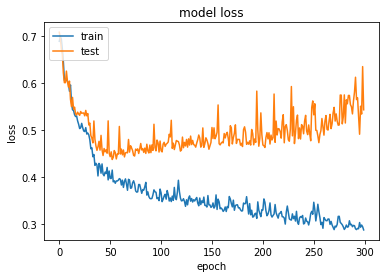

Accuracy History Plot


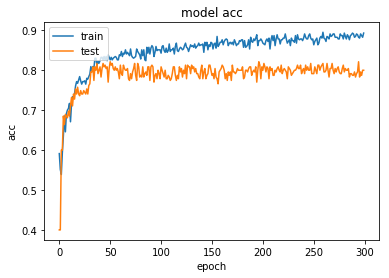

In [20]:
print('Loss History Plot') 
Loss_history = np.array([history.history['loss']])    
Val_Loss_history = np.array([history.history['val_loss']])    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('Accuracy History Plot') 
Acc_history = np.array([history.history['acc']])    
Val_Acc_history = np.array([history.history['val_acc']])    
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Terlihat bahwa model mulai melakukan overfitting pada daerah sekitar 75, maka fitting model lebih baik dihentikan pada 75 epoch

### Predicting from Model

In [21]:
prediction = model.predict(x_test)
print(prediction)

[[1.1814944e+00 3.6350915e+00]
 [3.1081623e-01 4.5828729e+00]
 [4.9944611e+00 4.8455235e-01]
 [2.8506378e-03 4.7492290e+00]
 [4.9944577e+00 4.8455399e-01]
 [4.9940467e+00 4.8472044e-01]
 [4.9944472e+00 4.8455906e-01]
 [1.5721543e-02 4.9361658e+00]
 [2.5375128e+00 2.4601245e+00]
 [4.9944506e+00 4.8455751e-01]
 [9.3906850e-01 3.8590693e+00]
 [4.9945478e+00 4.8451331e-01]
 [2.8567002e-03 4.7493424e+00]
 [4.9942336e+00 4.8464680e-01]
 [4.9939322e+00 4.8476470e-01]
 [2.9476724e+00 2.0881131e+00]
 [4.9944568e+00 4.8455429e-01]
 [4.9945402e+00 4.8451889e-01]
 [8.9240026e-01 3.8968234e+00]
 [2.8610986e-03 4.7494278e+00]
 [4.9941778e+00 4.8466933e-01]
 [3.4862092e+00 1.5591512e+00]
 [3.4128535e-03 4.7650933e+00]
 [3.5709681e-03 4.7705679e+00]
 [4.9944506e+00 4.8455763e-01]
 [4.9937434e+00 4.8483545e-01]
 [4.9944472e+00 4.8455897e-01]
 [3.0028988e-03 4.7528148e+00]
 [4.9583907e+00 4.9743003e-01]
 [4.9944539e+00 4.8455575e-01]
 [3.3014433e+00 1.7612065e+00]
 [4.2420562e-02 4.9897408e+00]
 [4.9942

Output dari model yang digunakan adalah menggunakan confidence level, maka confidence level yang tertinggi menunjukan kelas yang digunakan. untuk mendapatkan nilai maximal dari setiap prediksi digunakan `np.argmax`.

In [0]:
y_pred = np.argmax(prediction,axis=1)
y_true = np.argmax(y_test.values,axis=1)

Menentukan Accuracy, Precision dan recall dengan `sklearn.metrics`



In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_true,y_pred)
macro_precision = precision_score(y_true, y_pred, average='macro')
micro_precision = precision_score(y_true, y_pred, average='micro') 
macro_recall = recall_score(y_true, y_pred, average='macro')
micro_recall = recall_score(y_true, y_pred, average='micro')

print('Accuracy = ' + str(acc))
print('macro_precision = ' + str(macro_precision))
print('micro_precision = ' + str(micro_precision))
print('macro_recall = ' + str(macro_recall))
print('micro_recall = ' + str(micro_recall))




Accuracy = 0.8
macro_precision = 0.7993752028562155
micro_precision = 0.8
macro_recall = 0.7783687943262412
micro_recall = 0.8


#Regression (Boston housing)


## Preparing the Data

Pada regression akan digunakan data dari **[boston housing](http://lib.stat.cmu.edu/datasets/boston)** yang disiapkan oleh keras dan diambil dari database [StatLib](http://lib.stat.cmu.edu/datasets/). 

In [24]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


Pada dataset ini data sudah disiapkan oleh keras dan berada dalam bentuk array. untuk keperluan pembelajaran data dianggap sudah baik, maka tidak dilakukan data cleaning

In [25]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

## Creating and Training the Model

### Creating the Model

Pada model regressi dapat dilihat bahwa digunakan activation function `tf.nn.relu` yang merupakan fungsi `Rectifying Linear Unit` dengan nilai dibawah 0 dianggap sebagai 0. 

![alt text](https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png)

ReLu digunakan dikarenakan kecepatan ReLU dalam processing.



> untuk keperluan regressi, activation function yang digunakan tidak dibatasi antara 0 dan 1 dikarenakan keperluan model untuk  mendapatkan nilai yang sesungguhnya

selain itu terlihat bahwa output fungsi hanyalah 1 noda, hal ini dikarenakan output data yang diinginkan merupakan dalam bentuk skala. maka hanya diperlukan 1 buah output. bila regressi yang diinginkan merupakan regressi dari beberapa parameter sekaligus, maka dapat digunakan beberapa noda output secara bersamaan

In [0]:
model = keras.Sequential([
  keras.layers.Dense(330, activation=tf.nn.relu, input_shape=[13]),
  keras.layers.Dense(230, activation=tf.nn.relu),
  keras.layers.Dense(150, activation=tf.nn.relu),
  keras.layers.Dense(130, activation=tf.nn.relu),
  keras.layers.Dense(130, activation=tf.nn.relu),
  keras.layers.Dense(130, activation=tf.nn.relu),
  keras.layers.Dense(130, activation=tf.nn.relu),
  keras.layers.Dense(1)
])



Pada keras, model dapat dievaluasi menggunakan `model.summary()`

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 330)               4620      
_________________________________________________________________
dense_9 (Dense)              (None, 230)               76130     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               34650     
_________________________________________________________________
dense_11 (Dense)             (None, 130)               19630     
_________________________________________________________________
dense_12 (Dense)             (None, 130)               17030     
_________________________________________________________________
dense_13 (Dense)             (None, 130)               17030     
_________________________________________________________________
dense_14 (Dense)             (None, 130)              

### Compiling the Model

Untuk keperluan regressi, loss yang umum digunakna merupakan `mean_squared_error` atau `mse`. berikut merupakan persamaan MSE

![alt text](https://study.com/cimages/multimages/16/4e7cf150-0179-4d89-86f2-5cbb1f51c266_meansquarederrorformula.png)

MSE digunakan untuk mengetahui berapa besar kesalahan dari data yang diprediksi dengan data sesungguhnya. 

In [0]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
             )


### Train the Model

In [29]:
with tf.device('/gpu:1'):
     history = model.fit(x_train, y_train,
              batch_size=20,
              epochs=200,
              verbose=1,
              shuffle = True,
     #         validation_split = 0.333
              validation_data = (x_test,y_test)
              )


Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 1s 2ms/sample - loss: 126.1682 - val_loss: 162.3645
Epoch 2/200
404/404 [==============================] - 0s 268us/sample - loss: 92.1281 - val_loss: 61.4558
Epoch 3/200
404/404 [==============================] - 0s 289us/sample - loss: 62.7765 - val_loss: 61.2777
Epoch 4/200
404/404 [==============================] - 0s 286us/sample - loss: 64.3838 - val_loss: 71.6348
Epoch 5/200
404/404 [==============================] - 0s 268us/sample - loss: 60.0459 - val_loss: 61.6834
Epoch 6/200
404/404 [==============================] - 0s 250us/sample - loss: 61.5178 - val_loss: 59.8321
Epoch 7/200
404/404 [==============================] - 0s 240us/sample - loss: 58.9116 - val_loss: 70.5214
Epoch 8/200
404/404 [==============================] - 0s 329us/sample - loss: 56.2804 - val_loss: 61.8965
Epoch 9/200
404/404 [==============================] - 0s 267us/sample - loss: 54.6439 - val_loss:

## Evaluation

### Showing Model History

Loss History Plot


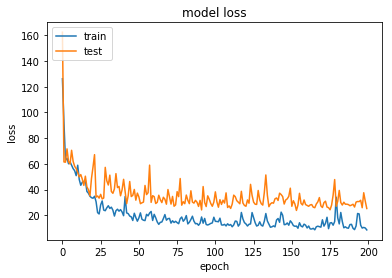

current MSE : 25.22765312942804


In [30]:
print('Loss History Plot') 
Loss_history = np.array([history.history['loss']])    
Val_Loss_history = np.array([history.history['val_loss']])    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('current MSE : ' + str(history.history['val_loss'][-1]))

### making prediction

running Predicitons
Predictions Finnish Running


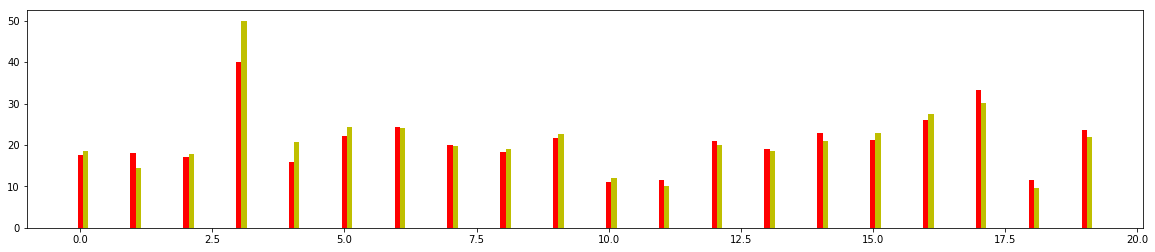

In [31]:
print('running Predicitons')
predictions = model.predict([x_test])
predictions = predictions
print('Predictions Finnish Running')

fig, ax = plt.subplots(figsize = (20,4))

start = 10
end = 30

ind = np.arange(len(predictions[start:end,0]))  # the x locations for the groups
width =0.1    # the width of the bars

prediction_data = ax.bar(ind, predictions[start:end,0], width, color='r')
actual_data = ax.bar(ind + width, y_test[start:end], width, color='y')
